 Table of Contents
* [Regular-Plots](#Regular-Plots)

* [Log-Log Plots](#Log-Log-Plots)
    
* [Overlayed Plots with MOOSE Data](#Overlayed-Plots-with-MOOSE-Data)

* [Error Calculations](#Error-Calculations)
    * [Problem 1a: Periodic Boundary Conditions, Square Domain.](#Problem-1b:-Periodic-Boundary-Conditions,-Square-Domain.)
	* [Problem 1b: Fixed-Flux Boundary Conditions, Square Domain.](#Problem-1c:-Fixed-Flux-Boundary-Conditions,-Square-Domain.)
    * [Problem 1c: Fixed-Flux Boundary Conditions, T-Shaped Domain.](#Problem-1c:-Fixed-Flux-Boundary-Conditions,-T-Shaped-Domain.)

## Free Energy Plots, Varying Grid Sizes

## Regular Plots

The following cell plots the free energy of the system from benchmark problem 1a, as a function  of time, for a single domain and grid size.
This first example has 200 cells to a side.

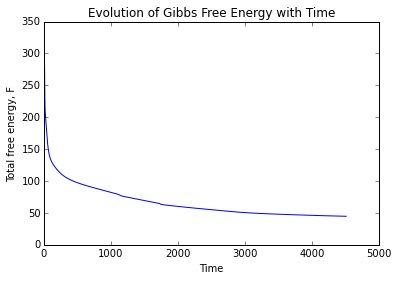

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

problem = 1
domain = "a"
size = 200
filename = "/data/and9/surf-research/Anushka/{0}{1}/{0}{1}{2}.npz"

# load and cut off values at given duration
times = np.load(filename.format(problem, domain, size))['time']
vals = np.load(filename.format(problem, domain, size))['f']
plt.figure(1)
plt.xlabel('Time')
plt.ylabel('Total free energy, F')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.plot(times, vals)
plt.show()

This next cell overlays free energy curves for various grid sizes and each domain for the same problem.
The maximum time to which the data is plotted is controlled by the "duration" variable below. This was necessary to produce evenly sized plots in case some grid sizes were run to different durations than others.

Domain a
Periodic Boundary Conditions on a Square Domain


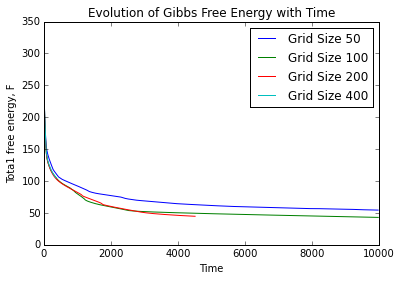

Domain b
Fixed-Flux Boundary Conditions on a Square Domain


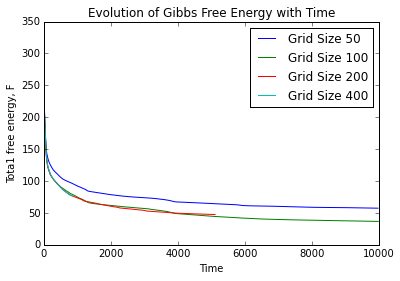

Domain c
Fixed-Flux Boundary Conditions on a T-Shaped Domain


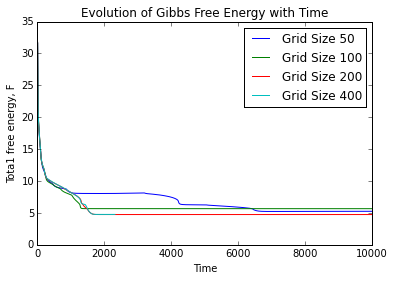

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

descriptions = ["Periodic Boundary Conditions on a Square Domain" , 
                "Fixed-Flux Boundary Conditions on a Square Domain" , 
                "Fixed-Flux Boundary Conditions on a T-Shaped Domain"]

problems = [1]
domains = ["a", "b", "c"]
sizes = [50, 100, 200, 400]
filename = "/data/and9/surf-research/Anushka/{0}{1}/{0}{1}{2}.npz"

duration = 9990

for problem in problems:
    for domain in domains:
        for size in sizes:
            
            times = np.load(filename.format(problem, domain, size))['time']
            times = times[times < duration]

            vals = np.load(filename.format(problem, domain, size))['f']
            vals = vals[times < duration]
            
            plt.plot(times, vals, label = 'Grid Size {0}'.format(size))
        
        print "Domain {0}".format(domain)
        print descriptions[domains.index(domain)]
        plt.xlabel('Time')
        plt.ylabel('Tota1 free energy, F')
        plt.title('Evolution of Gibbs Free Energy with Time')
        plt.legend(loc='best')
        plt.show()

## Log-Log Plots

The next cell creates the same overlayed plots, but with log-log scaling on both axes.

Domain a
Periodic Boundary Conditions on a Square Domain


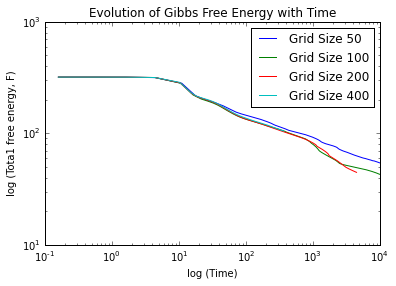

Domain b
Fixed-Flux Boundary Conditions on a Square Domain


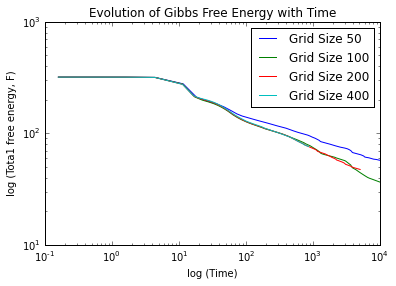

Domain c
Fixed-Flux Boundary Conditions on a T-Shaped Domain


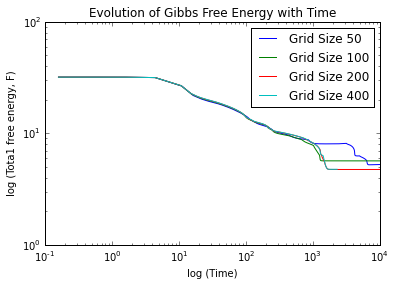

In [25]:
for problem in problems:
    for domain in domains:
        for size in sizes:
            
            times = np.load(filename.format(problem, domain, size))['time']
            times = times[times < duration]

            vals = np.load(filename.format(problem, domain, size))['f']
            vals = vals[times < duration]
            
            plt.loglog(times, vals, label = 'Grid Size {0}'.format(size))
        
        print "Domain {0}".format(domain)
        print descriptions[domains.index(domain)]
        
        plt.xlabel('log (Time)')
        plt.ylabel('log (Tota1 free energy, F)')
        plt.title('Evolution of Gibbs Free Energy with Time')
        plt.legend(loc='best')
        plt.show()

## Overlayed Plots with MOOSE Data

MOOSE data obtained from Dr. Andrea Jokisaari is now added to the previous plots for comparison purposes.

plotted regulars for a
hackathon_p1_square_PBC_IA.csv
Domain a
Periodic Boundary Conditions on a Square Domain


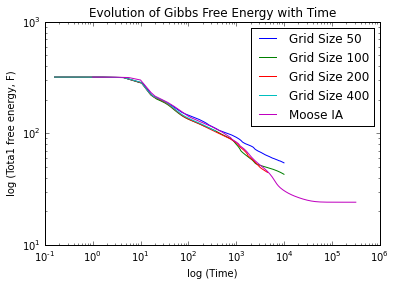

plotted regulars for b
hackathon_p1_square_NF_IA.csv
hackathon_p1_square_NF_STA.csv
Domain b
Fixed-Flux Boundary Conditions on a Square Domain


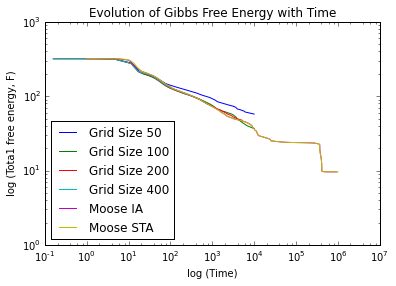

plotted regulars for c
hackathon_p1_tshape_IA.csv
Domain c
Fixed-Flux Boundary Conditions on a T-Shaped Domain


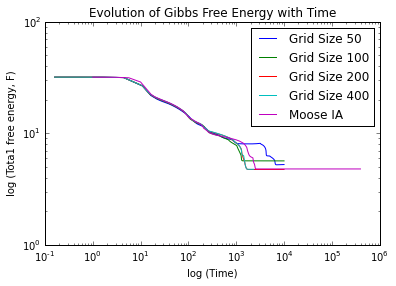

In [29]:
import pandas as pd

# moose_files = "IA":"hackathon_p1_square_PBC_IA.csv"}, 
#                'b': [{"IA":"hackathon_p1_square_NF_IA.csv"} , {"STA":"hackathon_p1_square_NF_STA.csv"}], 
#                'c': [{"IA":"hackathon_p1_tshape_NF_IA.csv"}], 
#                'd': [{"IA":"hackathon_p1_sphere_IA.csv"} , {"STA":"hackathon_p1_sphere_IA.csv"}]}

moose_files = ["hackathon_p1_square_PBC_IA.csv", "$",
              "hackathon_p1_square_NF_IA.csv", "hackathon_p1_square_NF_STA.csv", "$",
              "hackathon_p1_tshape_IA.csv", "$",
              "hackathon_p1_sphere_IA.csv", "hackathon_p1_sphere_STA.csv"]
stepper_list = ["IA", "STA"]

moose_index = 0

def moose_plotter(moose_index):
    stepper_index = 0
    while moose_files[moose_index]!="$":
        df1 = pd.read_csv(moose_files[moose_index])['time']
        df2 = pd.read_csv(moose_files[moose_index])['TotalEnergy']
        plt.loglog(df1, df2, label = 'Moose ' + stepper_list[stepper_index])
        stepper_index +=1
        moose_index += 1
    moose_index +=1
    return moose_index

for problem in problems:
    for domain in domains:
        for size in sizes:
            
            times = np.load(filename.format(problem, domain, size))['time']
            times = times[times < duration]

            vals = np.load(filename.format(problem, domain, size))['f']
            vals = vals[times < duration]
            
            plt.loglog(times, vals, label = 'Grid Size {0}'.format(size))
            
        print "plotted regulars for {0}".format(domain)
        
        moose_index = moose_plotter(moose_index)
        
        
        print "Domain {0}".format(domain)
        print descriptions[domains.index(domain)]
        
        plt.xlabel('log (Time)')
        plt.ylabel('log (Tota1 free energy, F)')
        plt.title('Evolution of Gibbs Free Energy with Time')
        plt.legend(loc='best')
        plt.show()

## Error Calculations

First, the data for each domain is interpolated to a list of evenly spaced elapsed times so that error values are calculated at the same time steps for each run.
Then, we find the differences in free energy values for each grid size with respect to the finest grid (400x400).
Finally, the norms of these differences are calculated and plotted.

## Problem 1b: Periodic Boundary Conditions, Square Domain.

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

problems = [1]
domains = ["a"]
sizes = [50, 100, 200]
filename = "/data/and9/surf-research/Anushka/{0}{1}/{0}{1}{2}.npz"

for problem in problems:
    times400 = np.load(filename.format(problem, domain, 400))['time']
    vals400 = np.load(filename.format(problem, domain, 400))['f']
    
    ideal_times = []
    for i in range (int(times400[-1])):
        ideal_times.append(i)
    
    f400 = interp1d(times400, vals400)
    y400 = f400(ideal_times)
    
    for domain in domains:
        for size in sizes:
            
            times = np.load(filename.format(problem, domain, size))['time']
            times = times[times < duration]

            vals = np.load(filename.format(problem, domain, size))['f']
            vals = vals[times < duration]
            
            f = interp1d(times, vals)
            y = f(ideal_times)
            
            diff = np.absolute(y-y400)
            
            exec "diff_{0} = diff".format(size)

In [56]:
print "L1 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 1))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 1))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 1))
# print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, 1))

L1 Norms for error relative to a 400 grid size
50 grid size: 2,663.06
100 grid size: 660.04
200 grid size: 732.19


In [57]:
print "L2 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 2))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 2))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 2))

L2 Norms for error relative to a 400 grid size
50 grid size: 144.45
100 grid size: 43.50
200 grid size: 38.61


In [58]:
print "L_inf Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, np.inf))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, np.inf))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, np.inf))
# print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, np.inf))

L_inf Norms for error relative to a 400 grid size
50 grid size: 10.57
100 grid size: 5.67
200 grid size: 2.69


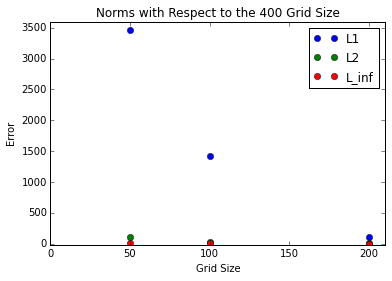

In [42]:
plt.figure(5)
plt.xlabel('Grid Size')
plt.ylabel('Error')
plt.title('Norms with Respect to the 400 Grid Size')

plt.plot([50, 100, 200], [np.linalg.norm(diff_50, 1), np.linalg.norm(diff_100, 1), np.linalg.norm(diff_200, 1)], marker = 'o', linestyle = 'None', label = 'L1')
plt.plot([50, 100, 200], [np.linalg.norm(diff_50, 2), np.linalg.norm(diff_100, 2), np.linalg.norm(diff_200, 2)], marker = 'o', linestyle = 'None', label = 'L2')
plt.plot([50, 100, 200], [np.linalg.norm(diff_50, np.inf), np.linalg.norm(diff_100, np.inf), np.linalg.norm(diff_200, np.inf)], marker ='o', linestyle = 'None', label = 'L_inf')
plt.legend(loc='best')
plt.xlim(0, 210)
plt.ylim(-20, 3600)
plt.show()

## Problem 1b: Fixed-Flux Boundary Conditions, Square Domain.

Also for a square domain with side length 200 units, the following cell plots the free energy of the system from benchmark problem 1b as a function  of time. This time the cells are 4 units wide.

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

problems = [1]
domains = ["b"]
sizes = [50, 100, 200]
filename = "/data/and9/surf-research/Anushka/{0}{1}/{0}{1}{2}.npz"

for problem in problems:
    times400 = np.load(filename.format(problem, domain, 400))['time']
    vals400 = np.load(filename.format(problem, domain, 400))['f']
    
    ideal_times = []
    for i in range (int(times400[-1])):
        ideal_times.append(i)
    
    f400 = interp1d(times400, vals400)
    y400 = f400(ideal_times)
    
    for domain in domains:
        for size in sizes:
            
            times = np.load(filename.format(problem, domain, size))['time']
            times = times[times < duration]

            vals = np.load(filename.format(problem, domain, size))['f']
            vals = vals[times < duration]
            
            f = interp1d(times, vals)
            y = f(ideal_times)
            
            diff = np.absolute(y-y400)
            
            exec "diff_{0} = diff".format(size)

In [71]:
print "L1 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 1))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 1))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 1))
# print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, 1))

L1 Norms for error relative to a 400 grid size
50 grid size: 13,391.41
100 grid size: 1,486.08
200 grid size: 376.42


In [72]:
print "L2 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 2))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 2))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 2))

L2 Norms for error relative to a 400 grid size
50 grid size: 467.66
100 grid size: 60.29
200 grid size: 19.48


In [73]:
print "L_inf Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, np.inf))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, np.inf))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, np.inf))
# print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, np.inf))

L_inf Norms for error relative to a 400 grid size
50 grid size: 19.69
100 grid size: 5.86
200 grid size: 2.13


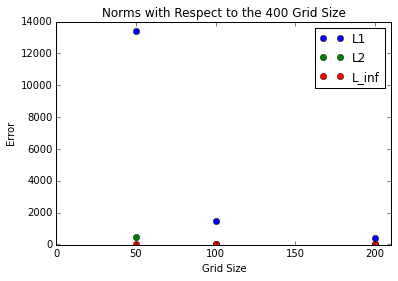

In [75]:
plt.figure(5)
plt.xlabel('Grid Size')
plt.ylabel('Error')
plt.title('Norms with Respect to the 400 Grid Size')

plt.plot([50, 100, 200], [np.linalg.norm(diff_50, 1), np.linalg.norm(diff_100, 1), np.linalg.norm(diff_200, 1)], marker = 'o', linestyle = 'None', label = 'L1')
plt.plot([50, 100, 200], [np.linalg.norm(diff_50, 2), np.linalg.norm(diff_100, 2), np.linalg.norm(diff_200, 2)], marker = 'o', linestyle = 'None', label = 'L2')
plt.plot([50, 100, 200], [np.linalg.norm(diff_50, np.inf), np.linalg.norm(diff_100, np.inf), np.linalg.norm(diff_200, np.inf)], marker ='o', linestyle = 'None', label = 'L_inf')
plt.legend(loc='best')
plt.xlim(0, 210)
plt.ylim(-20, 14000)
plt.show()

## Problem 1c: Fixed-Flux Boundary Conditions, T-Shaped Domain.

Also for a square domain with side length 200 units, the following cell plots the free energy of the system from benchmark problem 1b as a function  of time. This time the cells are 4 units wide.

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

problems = [1]
domains = ["c"]
sizes = [50, 100, 200]
filename = "/data/and9/surf-research/Anushka/{0}{1}/{0}{1}{2}.npz"

for problem in problems:
    times400 = np.load(filename.format(problem, domain, 400))['time']
    vals400 = np.load(filename.format(problem, domain, 400))['f']
    
    ideal_times = []
    for i in range (int(times400[-1])):
        ideal_times.append(i)
    
    f400 = interp1d(times400, vals400)
    y400 = f400(ideal_times)
    
    for domain in domains:
        for size in sizes:
            
            times = np.load(filename.format(problem, domain, size))['time']
            times = times[times < duration]

            vals = np.load(filename.format(problem, domain, size))['f']
            vals = vals[times < duration]
            
            f = interp1d(times, vals)
            y = f(ideal_times)
            
            diff = np.absolute(y-y400)
            
            exec "diff_{0} = diff".format(size)

In [82]:
print "L1 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 1))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 1))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 1))
# print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, 1))

L1 Norms for error relative to a 400 grid size
50 grid size: 3,509.58
100 grid size: 1,440.73
200 grid size: 99.36


In [83]:
print "L2 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 2))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 2))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 2))

L2 Norms for error relative to a 400 grid size
50 grid size: 99.39
100 grid size: 32.52
200 grid size: 3.96


In [84]:
print "L_inf Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, np.inf))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, np.inf))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, np.inf))
# print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, np.inf))

L_inf Norms for error relative to a 400 grid size
50 grid size: 3.30
100 grid size: 1.11
200 grid size: 0.43


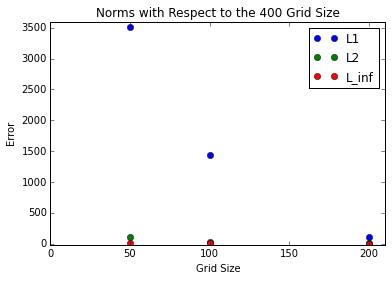

In [86]:
plt.figure(5)
plt.xlabel('Grid Size')
plt.ylabel('Error')
plt.title('Norms with Respect to the 400 Grid Size')

plt.plot([50, 100, 200], [np.linalg.norm(diff_50, 1), np.linalg.norm(diff_100, 1), np.linalg.norm(diff_200, 1)], marker = 'o', linestyle = 'None', label = 'L1')
plt.plot([50, 100, 200], [np.linalg.norm(diff_50, 2), np.linalg.norm(diff_100, 2), np.linalg.norm(diff_200, 2)], marker = 'o', linestyle = 'None', label = 'L2')
plt.plot([50, 100, 200], [np.linalg.norm(diff_50, np.inf), np.linalg.norm(diff_100, np.inf), np.linalg.norm(diff_200, np.inf)], marker ='o', linestyle = 'None', label = 'L_inf')
plt.legend(loc='best')
plt.xlim(0, 210)
plt.ylim(-20, 3600)
plt.show()

## 1b. Overlayed Plots 

This next plot overlays free energy curves for the same problem, for various grid sizes.
The maximum time to which the data is plotted is controlled by the "duration" variable below. This was necessary since some grid sizes were run to different durations than others.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

duration = 180

# load and cut off values at given duration
times = np.load('1b50/1b50.npz')['time']
times50x4 = times[times < duration]
vals = np.load('1b50/1b50.npz')['f']
vals50x4 = vals[times < duration]

# times = np.load('1b75/1b75.npz')['time']
# times75 = times[times < duration]
# vals = np.load('1b75/1b75.npz')['f']
# vals75 = vals[times < duration]

times = np.load('1b100/1b100.npz')['time']
times100x2 = times[times < duration]
vals = np.load('1b100/1b100.npz')['f']
vals100x2 = vals[times < duration]

times = np.load('1b200/1b200.npz')['time']
times200x1 = times[times < duration]
vals = np.load('1b200/1b200.npz')['f']
vals200x1 = vals[times < duration]

times = np.load('1b400/1b400.npz')['time']
times400x5 = times[times < duration]
vals = np.load('1b400/1b400.npz')['f']
vals400x5= vals[times < duration]

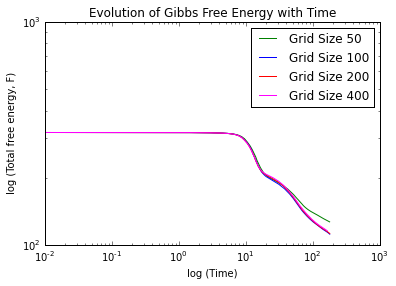

In [14]:
plt.figure(8)
plt.xlabel('log (Time)')
plt.ylabel('log (Total free energy, F)')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.loglog(times50x4, vals50x4, 'g', label = 'Grid Size 50')
plt.loglog(times100x2, vals100x2, 'b', label = 'Grid Size 100')
plt.loglog(times200x1, vals200x1, 'r', label = 'Grid Size 200')
plt.loglog(times400x5, vals400x5, 'magenta', label = 'Grid Size 400')
plt.legend(loc='best')
plt.show()

Here, the free energy data from the FiPy runs for various grid sizes is plotted alongside data from a Moose run using the conservative "IterationAdaptive" time stepper.

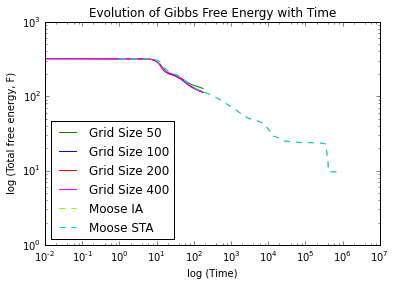

In [15]:
plt.figure(9)
plt.xlabel('log (Time)')
plt.ylabel('log (Total free energy, F)')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.loglog(times50x4, vals50x4, 'g', label = 'Grid Size 50')
plt.loglog(times100x2, vals100x2, 'b', label = 'Grid Size 100')
plt.loglog(times200x1, vals200x1, 'r', label = 'Grid Size 200')
plt.loglog(times400x5, vals400x5, 'magenta', label = 'Grid Size 400')

import pandas as pd
df1_IA = pd.read_csv("hackathon_p1_square_NF_IA.csv")['time']
df2_IA = pd.read_csv("hackathon_p1_square_NF_IA.csv")['TotalEnergy']
plt.loglog(df1_IA, df2_IA, linestyle = '--', color = 'chartreuse', label = 'Moose IA')
df1_STA = pd.read_csv("hackathon_p1_square_NF_STA.csv")['time']
df2_STA = pd.read_csv("hackathon_p1_square_NF_STA.csv")['TotalEnergy']
plt.loglog(df1_STA, df2_STA, linestyle = '--', color = 'deepskyblue', label = 'Moose STA')
plt.legend(loc='best')
plt.show()

Interpolation so that error values are calculated at the same time steps for each run:

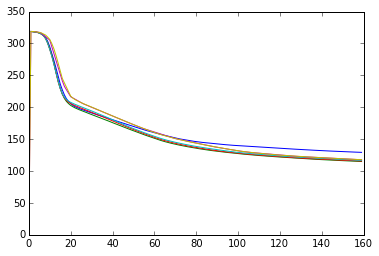

In [16]:
from scipy.interpolate import interp1d
ideal_times = []
for i in range (160):
    ideal_times.append(i)
    
f50x4 = interp1d(times50x4, vals50x4)
f75 = interp1d(times75, vals75)
f100x2 = interp1d(times100x2, vals100x2)
f200x1 = interp1d(times200x1, vals200x1)
f400x5 = interp1d(times400x5, vals400x5)
fmooseIA = interp1d(df1_IA, df2_IA)
fmooseSTA = interp1d(df1_STA, df2_STA)


y50x4 = f50x4(ideal_times)
y75 = f75(ideal_times)
y100x2 = f100x2(ideal_times)
y200x1 = f200x1(ideal_times)
y400x5 = f400x5(ideal_times)
ymooseIA = fmooseIA(ideal_times)
ymooseSTA = fmooseSTA(ideal_times)
# plot of interpolated free energies
plt.figure(10)
plt.plot(ideal_times, y50x4, ideal_times, y100x2, ideal_times, y200x1, ideal_times, y400x5, ideal_times, ymooseIA, ideal_times, ymooseSTA)
plt.show()

## 1b. Error Calculations

In [19]:
import numpy as np

diff_50 = np.absolute(y50x4 - y400x5)
diff_75 = np.absolute(y75 - y400x5)
diff_100 = np.absolute(y100x2 - y400x5)
diff_200 = np.absolute(y200x1 - y400x5)
diff_mooseIA = np.absolute(ymooseIA - y400x5)
diff_mooseSTA = np.absolute(ymooseSTA - y400x5)

In [20]:
print "L1 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 1))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 1))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 1))
print "Moose (IA): {:0,.2f}".format(np.linalg.norm(diff_mooseIA, 1))
print "Moose (STA): {:0,.2f}".format(np.linalg.norm(diff_mooseSTA, 1))

L1 Norms for error relative to a 400 grid size
50 grid size: 1,200.64
100 grid size: 415.56
200 grid size: 209.47
Moose (IA): 1,044.67
Moose (STA): 1,094.91


In [43]:
print "L2 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 2))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 2))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 2))
print "Moose (IA): {:0,.2f}".format(np.linalg.norm(diff_mooseIA, 2))
print "Moose (STA): {:0,.2f}".format(np.linalg.norm(diff_mooseSTA, 2))

L2 Norms for error relative to a 400 grid size
50 grid size: 108.95
100 grid size: 37.38
200 grid size: 17.69
Moose (IA): 328.40
Moose (STA): 331.49


In [44]:
print "L_inf Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, np.inf))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, np.inf))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, np.inf))
print "Moose (IA): {:0,.2f}".format(np.linalg.norm(diff_mooseIA, np.inf))
print "Moose (STA): {:0,.2f}".format(np.linalg.norm(diff_mooseSTA, np.inf))

L_inf Norms for error relative to a 400 grid size
50 grid size: 12.61
100 grid size: 5.90
200 grid size: 2.11
Moose (IA): 319.04
Moose (STA): 319.04


norms: L1 (|f_100-f_200|), L2 = SUM (f_100-f_200)^2 -->scipy interpolate

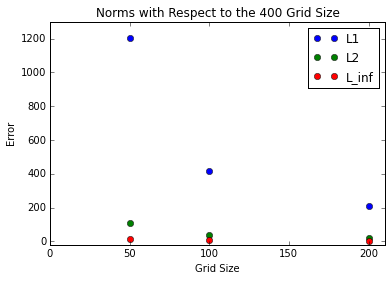

In [35]:
plt.figure(11)
plt.xlabel('Grid Size')
plt.ylabel('Error')
plt.title('Norms with Respect to the 400 Grid Size')

plt.plot([50, 75, 100, 200], [np.linalg.norm(diff_50, 1), np.linalg.norm(diff_75, 1), np.linalg.norm(diff_100, 1), np.linalg.norm(diff_200, 1)], marker = 'o', linestyle = 'None', label = 'L1')
plt.plot([50, 75, 100, 200], [np.linalg.norm(diff_50, 2), np.linalg.norm(diff_75, 1), np.linalg.norm(diff_100, 2), np.linalg.norm(diff_200, 2)], marker = 'o', linestyle = 'None', label = 'L2')
plt.plot([50, 75, 100, 200], [np.linalg.norm(diff_50, np.inf), np.linalg.norm(diff_75, 1), np.linalg.norm(diff_100, np.inf), np.linalg.norm(diff_200, np.inf)], marker ='o', linestyle = 'None', label = 'L_inf')
plt.legend(loc='best')
plt.xlim(0, 210)
plt.ylim(-20, 1300)
plt.show()

## Problem 1c: T-shaped Domain

Problem 1c is the same diffusion problem on a t-shaped domain, 100 units tall and wide with arms 20 units in width.

Regular Plot


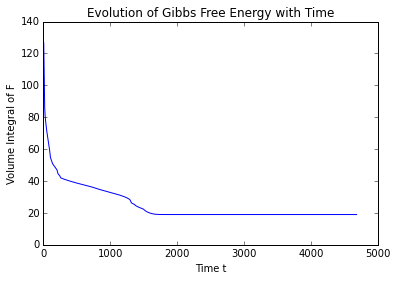

Log-Log Plot


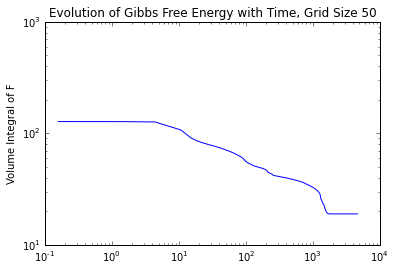

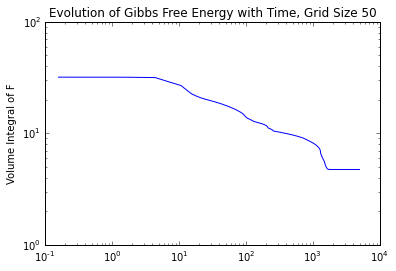

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

print "Regular Plot"

plt.figure(12)
plt.xlabel('Time t')
plt.ylabel('Volume Integral of F')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.plot(np.load('1c/1c200.npz')['time'], np.load('1c/1c200.npz')['f'])
plt.show()

print "Log-Log Plot"

plt.figure(13)
plt.ylabel('Volume Integral of F')
plt.title('Evolution of Gibbs Free Energy with Time, Grid Size 50')
plt.loglog(np.load('1c/1c200.npz')['time'], np.load('1c/1c200.npz')['f'])
plt.show()

This next plot overlays free energy curves for the same problem, for various grid sizes.
The maximum time to which the data is plotted is controlled by the "duration" variable below. This was necessary since some grid sizes were run to different durations than others.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

duration = 4501

# load and cut off values at given duration
times = np.load('1c/1c50.npz')['time']
times50 = times[times < duration]
vals = np.load('1c/1c50.npz')['f']
vals50 = vals[times < duration]

# times = np.load('1c/1c75.npz')['time']
# times50x4 = times[times < duration]
# vals = np.load('1c/1c75.npz')['f']
# vals50x4 = vals[times < duration]

times = np.load('1c/1c100.npz')['time']
times100 = times[times < duration]
vals = np.load('1c/1c100.npz')['f']
vals100 = vals[times < duration]

times = np.load('1c/1c200.npz')['time']
times200 = times[times < duration]
vals = np.load('1c/1c200.npz')['f']
vals200 = vals[times < duration]

times = np.load('1c/1c400.npz')['time']
times400 = times[times < duration]
vals = np.load('1c/1c400.npz')['f']
vals400= vals[times < duration]

## 1c. Overlayed Plots

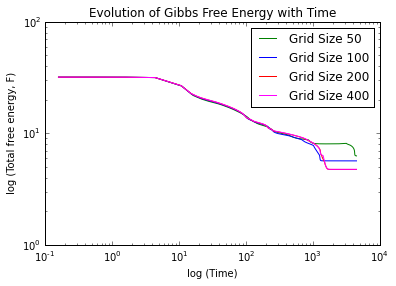

In [5]:
plt.figure(14)
plt.xlabel('log (Time)')
plt.ylabel('log (Total free energy, F)')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.loglog(times50, .25*vals50, 'g', label = 'Grid Size 50')
plt.loglog(times100, 4.0*vals100, 'b', label = 'Grid Size 100')
plt.loglog(times200, .25*vals200, 'r', label = 'Grid Size 200')
plt.loglog(times400, vals400, 'magenta', label = 'Grid Size 400')
plt.legend(loc='best')
plt.show()

Here, the free energy data from the FiPy runs for various grid sizes is plotted alongside data from a Moose run using the conservative "IterationAdaptive" time stepper.

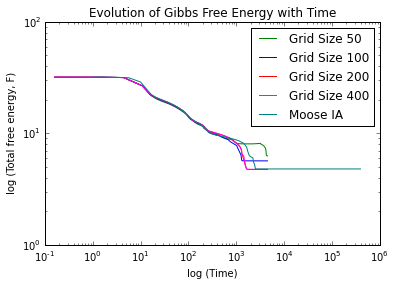

In [6]:
plt.figure(15)
plt.xlabel('log (Time)')
plt.ylabel('log (Total free energy, F)')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.loglog(times50, .25*vals50, 'g', label = 'Grid Size 50')
plt.loglog(times100, 4.0*vals100, 'b', label = 'Grid Size 100')
plt.loglog(times200, .25*vals200, 'r', label = 'Grid Size 200')
plt.loglog(times400, vals400, 'magenta', label = 'Grid Size 400')

import pandas as pd
df1 = pd.read_csv("hackathon_p1_tshape_IA.csv")['time']
df2 = pd.read_csv("hackathon_p1_tshape_IA.csv")['TotalEnergy']
plt.loglog(df1, df2, 'teal', label = 'Moose IA')
plt.legend(loc='best')
plt.show()

Interpolation so that error values are calculated at the same time steps for each run:

In [8]:
from scipy.interpolate import interp1d

ideal_times = []
for i in range (4499):
    ideal_times.append(i)

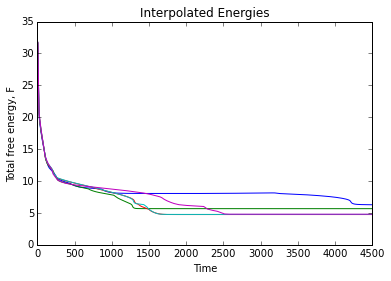

In [12]:
df1cut = df1[df1 < duration]
df2cut = df2[df1 < duration]

f50 = interp1d(times50, .25*vals50)
# f75 = interp1d(times75, vals75)
f100 = interp1d(times100, 4.0*vals100)
f200 = interp1d(times200, .25*vals200)
f400 = interp1d(times400, vals400)
fmoose = interp1d(df1, df2)

y50 = f50(ideal_times)
# y75 = f75(ideal_times)
y100 = f100(ideal_times)
y200 = f200(ideal_times)
y400 = f400(ideal_times)
ymoose = fmoose(ideal_times)
# plot of interpolated free energies
plt.figure(16)
plt.xlabel('Time')
plt.ylabel('Total free energy, F')
plt.title('Interpolated Energies')
plt.plot(ideal_times, y50, ideal_times, y100, ideal_times, y200, ideal_times, y400, ideal_times, ymoose)
plt.show()

## 1c. Error Calculations

In [34]:
import numpy as np

diff_50 = np.absolute(y50x2-ymoose)
# diff_75 = np.absolute(y75-y400x5)
diff_100 = np.absolute(y100x1-ymoose)
diff_200 = np.absolute(y200x5-ymoose)
# diff_moose = np.absolute(ymoose-y400x5)

In [35]:
print "L1 Norms for error relative to a Moose run"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 1))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 1))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 1))
# print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, 1))

L1 Norms for error relative to a Moose run
50 grid size: 7,857.44
100 grid size: 3,927.75
200 grid size: 2,588.45


In [36]:
print "L2 Norms for error relative to a Moose run"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 2))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 2))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 2))
# print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, 2))

L2 Norms for error relative to a Moose run
50 grid size: 147.23
100 grid size: 76.77
200 grid size: 71.46


In [37]:
print "L_inf Norms for error relative to a Moose run"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, np.inf))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, np.inf))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, np.inf))
# print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, np.inf))

L_inf Norms for error relative to a Moose run
50 grid size: 31.88
100 grid size: 31.88
200 grid size: 31.88


norms: L1 (|f_100-f_200|), L2 = SUM (f_100-f_200)^2 -->scipy interpolate

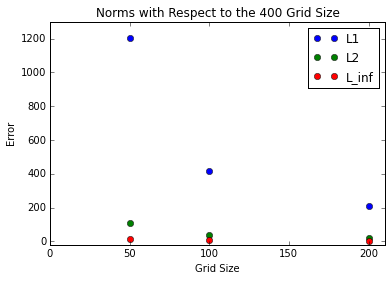

In [36]:
plt.figure(17)
plt.xlabel('Grid Size')
plt.ylabel('Error')
plt.title('Norms with Respect to the 400 Grid Size')

plt.plot([50, 75, 100, 200], [np.linalg.norm(diff_50, 1), np.linalg.norm(diff_75, 1), np.linalg.norm(diff_100, 1), np.linalg.norm(diff_200, 1)], marker = 'o', linestyle = 'None', label = 'L1')
plt.plot([50, 100, 200], [np.linalg.norm(diff_50, 2), np.linalg.norm(diff_75, 2), np.linalg.norm(diff_100, 2), np.linalg.norm(diff_200, 2)], marker = 'o', linestyle = 'None', label = 'L2')
plt.plot([50, 100, 200], [np.linalg.norm(diff_50, np.inf), np.linalg.norm(diff_75, np.inf), np.linalg.norm(diff_100, np.inf), np.linalg.norm(diff_200, np.inf)], marker ='o', linestyle = 'None', label = 'L_inf')
plt.legend(loc='best')
plt.xlim(0, 210)
plt.ylim(-20, 1300)
plt.show()

## Problem 1d: Spherical Domain

The following cell plots the free energy of the system from benchmark problem 1a as a function  of time, for a particular grid size and spacing: a side length of 200, with a spacing of 0.5.

In [120]:
df1_IA = pd.read_csv("hackathon_p1_sphere_IA.csv")['time']
print df1_IA

0      0.000000e+00
1      1.000000e+00
2      1.140710e+00
3      2.999038e+00
4      5.000000e+00
5      5.661145e+00
6      1.000000e+01
7      1.656880e+01
8      2.000000e+01
9      2.576175e+01
10     3.714139e+01
11     5.000000e+01
12     6.621646e+01
13     8.400616e+01
14     1.000000e+02
15     1.022705e+02
16     1.281844e+02
17     1.565756e+02
18     1.958332e+02
19     2.000000e+02
20     2.326195e+02
21     2.733938e+02
22     3.141681e+02
23     3.549424e+02
24     3.957167e+02
25     4.364911e+02
26     4.824086e+02
27     5.000000e+02
28     5.336579e+02
29     5.672582e+02
           ...     
329    1.398253e+06
330    1.440728e+06
331    1.487025e+06
332    1.507260e+06
333    1.522771e+06
334    1.527648e+06
335    1.535593e+06
336    1.546909e+06
337    1.551245e+06
338    1.558307e+06
339    1.568900e+06
340    1.581655e+06
341    1.595168e+06
342    1.608680e+06
343    1.622399e+06
344    1.638041e+06
345    1.653997e+06
346    1.670421e+06
347    1.686846e+06


9000


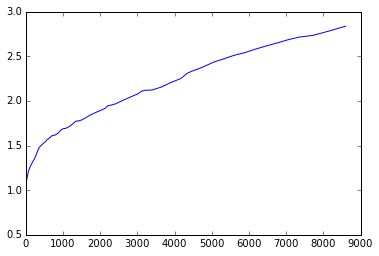

In [133]:
times = np.load("/data/and9/surf-research/Anushka/1d/1d{0}.npz".format(2500))['time']
duration = 9000
print duration
duration = int(duration)
vals = np.load("/data/and9/surf-research/Anushka/1d/1d{0}.npz".format(2500))['f']

times = times[times < duration]
vals = vals[times < duration]

import pandas as pd
df1_IA = pd.read_csv("hackathon_p1_sphere_IA.csv")['time']
df2_IA = pd.read_csv("hackathon_p1_sphere_IA.csv")['TotalEnergy']

df1cut = df1_IA[1:][df1_IA < duration]
df2cut = df2_IA[1:][df1_IA < duration]
f50 = interp1d(times, vals)
y50 = f50(df1cut)

plt.plot(df1cut, y50/df2cut)

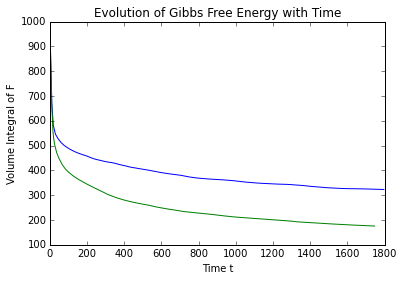

In [146]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

duration = 100
gridSize = 50
gridSize1 = 100
gridSize1 = 200
# gridSize1 = 400



# data folder address
address1 = "/data/and9/surf-research/Anushka/1d/1d{0}.npz".format(gridSize) #gridSize**2
duration = np.load(address1)['time'][-1]
import pandas as pd
df1_IA = pd.read_csv("hackathon_p1_sphere_IA.csv")['time']
df2_IA = pd.read_csv("hackathon_p1_sphere_IA.csv")['TotalEnergy']
# plt.loglog(df1_IA, df2_IA, linestyle = '--', color = 'chartreuse', label = 'Moose IA')

# load and cut off values at given duration
df1cut = df1_IA[1:][df1_IA < duration]
df2cut = df2_IA[1:][df1_IA < duration]
# plt.figure(18)
# plt.xlabel('Time t')
# plt.ylabel('Volume Integral of F')
# plt.title('Evolution of Gibbs Free Energy with Time')
# plt.plot(np.load('1d/1d100.npz')['time'], .433*np.load('1d/1d100.npz')['f'], df1cut, df2cut)
# plt.show()

plt.figure(18)
plt.xlabel('Time t')
plt.ylabel('Volume Integral of F')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.plot(np.load(address1)['time'], np.load(address1)['f'], df1cut, df2cut)

# plt.figure(19)
# plt.xlabel('Time t')
# plt.ylabel('Volume Integral of F')
# plt.title('Evolution of Gibbs Free Energy with Time')
# plt.loglog(np.load(address1)['time'], np.load(address1)['f'], df1cut, df2cut)
# plt.show()

# plt.plot(np.load(address1)['time'], (np.load(address1)['f']-df2cut))

# plt.show()
# plt.figure(19)
# plt.ylabel('Volume Integral of F')
# plt.title('Evolution of Gibbs Free Energy with Time, Grid Size 50')
# plt.loglog(np.load('1d/1d200.npz')['time'], np.load('1d/1d200.npz')['f'])
# plt.show()

In [60]:
print np.load(address1)['time'][-1]
# print df1_IA[time]

1233.95476699


This next plot overlays free energy curves for the same problem, for various grid sizes.
The maximum time to which the data is plotted is controlled by the "duration" variable below. This was necessary since some grid sizes were run to different durations than others.

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# duration = 4500

address2 = "/data/and9/surf-research/Anushka/1d{0}/1d{0}.npz".format(gridSize**2)
address3 = "/data/and9/surf-research/Anushka/1d{0}/1d{0}.npz".format(gridSize**2)
address4 = "/data/and9/surf-research/Anushka/1d{0}/1d{0}.npz".format(gridSize**2)

# load and cut off values at given duration
times = np.load(address1)['time']
duration = 1233
# times50 = times[times < duration]
vals = np.load(address1)['f']
# vals50 = vals[times < duration]

df1cut = df1_IA[df1_IA < duration]
df2cut = df2_IA[df1_IA < duration]

# times = np.load(address2)['time']
# times100 = times[times < duration]
# vals = np.load(address2)['f']
# vals100 = vals[times < duration]

# times = np.load(address3)['time']
# times200 = times[times < duration]
# vals = np.load(address3)['f']
# vals200 = vals[times < duration]

# times = np.load(address1)['time']
# times400 = times[times < duration]
# vals = np.load(address1)['f']
# vals400 = vals[times < duration]

## 1d. Overlayed Plots

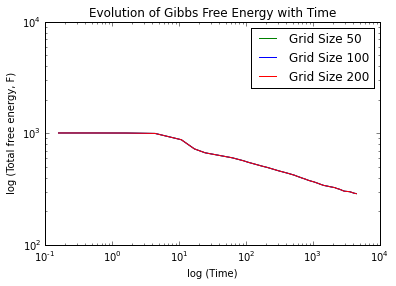

In [11]:
plt.figure(20)
plt.xlabel('log (Time)')
plt.ylabel('log (Total free energy, F)')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.loglog(times50, vals50, 'g', label = 'Grid Size 50')
plt.loglog(times100, vals100, 'b', label = 'Grid Size 100')
plt.loglog(times200, vals200, 'r', label = 'Grid Size 200')
# plt.loglog(times400, vals400, 'magenta', label = 'Grid Size 400')
plt.legend(loc='best')
plt.show()

Here, the free energy data from the FiPy runs for various grid sizes is plotted alongside data from a Moose run using both the conservative "IterationAdaptive" time stepper and the more aggressive "SolutionTimeAdaptive" time stepper.

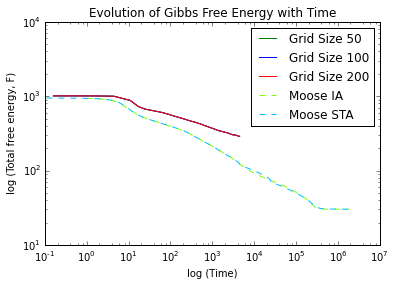

In [18]:
plt.figure(21)
plt.xlabel('log (Time)')
plt.ylabel('log (Total free energy, F)')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.loglog(times50, vals50, 'g', label = 'Grid Size 50')
plt.loglog(times100, vals100, 'b', label = 'Grid Size 100')
plt.loglog(times200, vals200, 'r', label = 'Grid Size 200')
# plt.loglog(times400, vals400, 'magenta', label = 'Grid Size 400')
import pandas as pd
df1_IA = pd.read_csv("hackathon_p1_sphere_IA.csv")['time']
print df1_IA
df2_IA = pd.read_csv("hackathon_p1_sphere_IA.csv")['TotalEnergy']
print
plt.loglog(df1_IA, df2_IA, linestyle = '--', color = 'chartreuse', label = 'Moose IA')
df1_STA = pd.read_csv("hackathon_p1_sphere_STA.csv")['time']
df2_STA = pd.read_csv("hackathon_p1_sphere_STA.csv")['TotalEnergy']
plt.loglog(df1_STA, df2_STA, linestyle = '--', color = 'deepskyblue', label = 'Moose STA')
plt.legend(loc='best')
plt.show()

Interpolation so that error values are calculated at the same time steps for each run:

In [41]:
print df1_IA
print df2_IA

0        0.000000
1        1.000000
2        1.140710
3        2.999038
4        5.000000
5        5.661145
6       10.000000
7       16.568797
8       20.000000
9       25.761749
10      37.141388
11      50.000000
12      66.216462
13      84.006163
14     100.000000
15     102.270467
16     128.184439
17     156.575636
18     195.833192
19     200.000000
20     232.619456
21     273.393776
22     314.168097
23     354.942417
24     395.716737
25     436.491057
26     482.408599
27     500.000000
28     533.657856
29     567.258154
         ...     
42    1295.996854
43    1324.779992
44    1364.495357
45    1429.187502
46    1520.255588
47    1617.819032
48    1746.394720
49    1922.637431
50    2000.000000
51    2127.023652
52    2212.513216
53    2289.576787
54    2415.105224
55    2619.577821
56    2871.769599
57    3000.000000
58    3044.133561
59    3112.237401
60    3218.508362
61    3391.612559
62    3642.708569
63    3902.222457
64    4161.736346
65    4314.200755
66    4335

In [57]:
from scipy.interpolate import interp1d

ideal_times = []
for i in range (int(duration)-1):
    ideal_times.append(i)

[ 940.93345245  927.07457837  909.46185884  888.3214419   866.8829072
  839.15177811  811.42064903  782.79463949  753.42222966  724.32591931
  701.05744694  677.78897456  658.59944268  642.81206624  627.26942433
  616.89257655  606.51572876  598.02526319  591.10818794  584.28662007
  579.48099752  574.67537498  570.54294544  566.97201154  563.43498473
  560.61366     557.79233528  555.25195107  552.94589323  550.65703063
  548.73112063  546.80521063  545.03365822  543.39085211  541.7579783
  540.33475301  538.91152771  537.57100387  536.2994595   535.03211165
  533.85334297  532.67457428  531.53034807  530.41493298  529.30177911
  528.23635443  527.17092975  526.12897151  525.10658613  524.08472683
  523.07397183  522.06321682  521.07362232  520.10167733  519.13126648
  518.19323786  517.25520923  516.32290289  515.39536936  514.46859282
  513.55779428  512.64699575  511.77262294  510.92863203  510.08841241
  509.32779634  508.56718028  507.84264244  507.14819668  506.45625776
  505.81

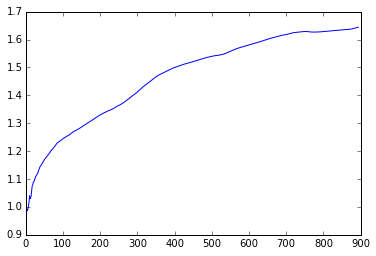

In [63]:

# df1_STA = df1_STA[df1_STA < duration]
# df2_STA = df2_STA[df1_STA < duration]

times50 = np.load(address1)['time']
vals50 = np.load(address1)['f']
f50 = interp1d(times50, vals50)
# f100x2 = interp1d(times100x2, vals100x2)
# f200x1 = interp1d(times200x1, vals200x1)
# f400x5 = interp1d(times400x5, vals400x5)
fmooseIA = interp1d(df1cut, df2cut)
# fmooseSTA = interp1d(df1_STA, df2_STA)

y50 = f50(ideal_times)
# y100 = f100(ideal_times)
# y200 = f200(ideal_times)
# y400 = f400x5(ideal_times)
ymooseIA = fmooseIA(ideal_times)
# ymooseSTA = fmooseSTA(ideal_times)
# plot of interpolated free energies
plt.figure(22)
# ideal_times, y100x2, ideal_times, y200x1, ideal_times, y400x5, , ideal_times, ymooseSTA
# ideal_times, y50, ideal_times, ymooseIA, 

plt.plot(ideal_times, y50/ymooseIA)

# plt.show()
print y50
print ymooseIA

In [42]:
df2cut[1]-vals50[0]

-74.398128267776997

## 1d. Error Calculations

In [23]:
import numpy as np

diff_50 = []
diff_100 = []
diff_200 = []
diff_moose = []

for i in range (180):
    diff_50.append(np.absolute(y50x4[i]-y400x5[i]))
    diff_100.append(np.absolute(y100x2[i]-y400x5[i]))
    diff_200.append(np.absolute(y200x1[i]-y400x5[i]))
    diff_moose.append(np.absolute(ymoose[i]-y400x5[i]))

In [25]:
print "L1 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 1))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 1))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 1))
print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, 1))

L1 Norms for error relative to a 400 grid size
50 grid size: 1,211.12
100 grid size: 501.18
200 grid size: 352.88
Moose: 1,394.51


In [26]:
print "L2 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 2))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 2))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 2))
print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, 2))

L2 Norms for error relative to a 400 grid size
50 grid size: 99.68
100 grid size: 41.35
200 grid size: 27.56
Moose: 330.81


In [27]:
print "L_inf Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, np.inf))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, np.inf))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, np.inf))
print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, np.inf))

L_inf Norms for error relative to a 400 grid size
50 grid size: 9.71
100 grid size: 5.67
200 grid size: 2.70
Moose: 319.10


norms: L1 (|f_100-f_200|), L2 = SUM (f_100-f_200)^2 -->scipy interpolate

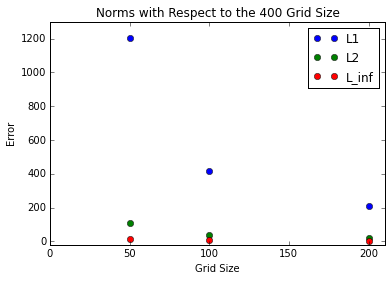

In [36]:
plt.figure(23)
plt.xlabel('Grid Size')
plt.ylabel('Error')
plt.title('Norms with Respect to the 400 Grid Size')

plt.plot([50, 100, 200], [np.linalg.norm(diff_50, 1), np.linalg.norm(diff_100, 1), np.linalg.norm(diff_200, 1)], marker = 'o', linestyle = 'None', label = 'L1')
plt.plot([50, 100, 200], [np.linalg.norm(diff_50, 2), np.linalg.norm(diff_100, 2), np.linalg.norm(diff_200, 2)], marker = 'o', linestyle = 'None', label = 'L2')
plt.plot([50, 100, 200], [np.linalg.norm(diff_50, np.inf), np.linalg.norm(diff_100, np.inf), np.linalg.norm(diff_200, np.inf)], marker ='o', linestyle = 'None', label = 'L_inf')
plt.legend(loc='best')
plt.xlim(0, 210)
plt.ylim(-20, 1300)
plt.show()

In [5]:
np.loadtxt('1a50x4.0.txt', usecols = [1])

array([ 19.93991924,  19.93977373,  19.93961304, ...,   3.62729153,
         3.62724293,   3.62719959])

In [8]:
times = np.loadtxt('1a50x4.0.txt', usecols = [0])

In [9]:
times_reduced = times[times < 2000]

In [10]:
times_reduced

array([  0.00000000e+00,   1.00000000e-02,   2.10000000e-02, ...,
         1.99609493e+03,   1.99778186e+03,   1.99963747e+03])

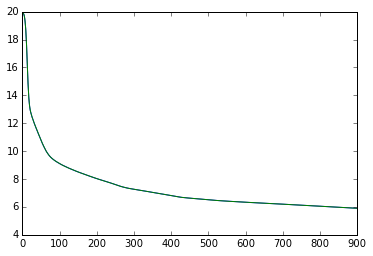

In [39]:
from scipy.interpolate import interp1d

ideal_times = []
for i in range (900):
    ideal_times.append(i)

f = interp1d(times50x4, vals50x4)
y_interp = f(ideal_times)
plt.plot(times50x4, vals50x4)
plt.plot(ideal_times, y_interp)
plt.show()

In [34]:
from scipy.interpolate import interp1d

x = np.array([0., 0.5, 2.0, 2.5])
x_interp = np.array([1.0, 1.5])
y = x**2

f = interp1d(x, y)
y_interp = f(x_interp)

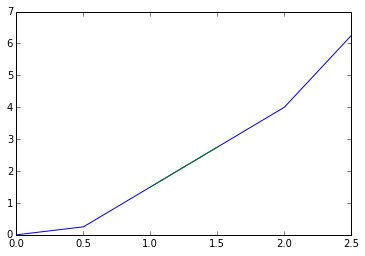

In [35]:
plt.plot(x, y)
plt.plot(x_interp, y_interp)
plt.show()

In [21]:
npz = np.load('1b50/1b50.npz')['time']
print len(npz)

448


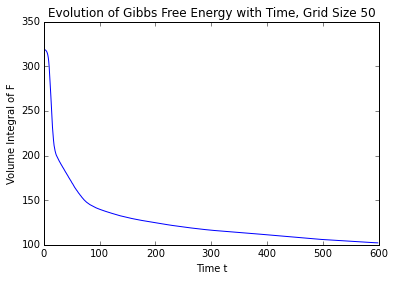

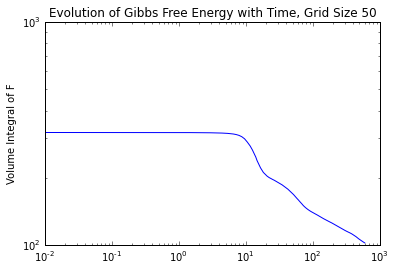

IOError: [Errno 2] No such file or directory: '1c400/1400.npz'

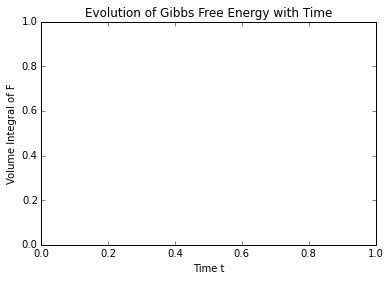

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(2)
plt.xlabel('Time t')
plt.ylabel('Volume Integral of F')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.plot(np.load('1c400/1400.npz')['time'], np.load('1b400/1b400.npz')['f'])
plt.show()
# plt.loglog(np.load('1b50/1b50.npz')['time'], np.load('1b50/1b50.npz')['f'])
# plt.show()

In [ ]:
plt.figure(2)
plt.xlabel('Time t')
plt.ylabel('Volume integral of f')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.plot(times50x4, vals50x4, 'g', label = 'Grid Size 50')
plt.plot(times100x2, vals100x2, 'b', label = 'Grid Size 100')
plt.plot(times200x1, vals200x1, 'r', label = 'Grid Size 200')
plt.plot(times400x5, vals400x5, 'magenta', label = 'Grid Size 400')
plt.legend(loc='best')
plt.show()

In [10]:
import pandas as pd
df1 = pd.read_csv("hackathon_p1_square_PBC_IA.csv")
print df1


              time  TotalEnergy
0         0.000000     0.000000
1         1.000000   319.006170
2         1.140710   318.974826
3         2.999038   318.388759
4         5.000000   317.063126
5         5.661145   316.312551
6        10.000000   300.553919
7        16.607605   231.919549
8        20.000000   215.847537
9        25.804315   204.448183
10       37.458309   188.864110
11       50.000000   174.900840
12       51.393870   173.536617
13       66.259489   160.784719
14       82.333802   150.475195
15       99.276375   142.691968
16      100.000000   142.433957
17      118.011238   137.247625
18      144.016870   132.110167
19      182.745671   126.469619
20      200.000000   124.377471
21      220.387160   122.166171
22      261.365352   118.412718
23      309.354003   114.833806
24      361.393516   110.984225
25      380.321729   109.339533
26      404.498345   108.200832
27      439.740291   106.254343
28      477.890477   104.166202
29      500.000000   103.147752
..      

In [35]:
import numpy as np
array1 = [1, 2, 3, 4, 5]
print np.linalg.norm(array1, np.inf)

5


In [23]:
import pandas as pd
df1 = pd.read_csv("hackathon_p1_sphere_IA.csv")
print df1

             time  TotalEnergy
0    0.000000e+00     0.000000
1    1.000000e+00   933.553990
2    1.140710e+00   931.799036
3    2.999038e+00   900.972324
4    5.000000e+00   848.466071
5    5.661145e+00   826.913147
6    1.000000e+01   674.111629
7    1.656880e+01   560.250371
8    2.000000e+01   532.733108
9    2.576175e+01   503.980325
10   3.714139e+01   470.819048
11   5.000000e+01   447.169252
12   6.621646e+01   423.910366
13   8.400616e+01   405.275846
14   1.000000e+02   393.235378
15   1.022705e+02   391.738986
16   1.281844e+02   376.342619
17   1.565756e+02   362.544999
18   1.958332e+02   346.211394
19   2.000000e+02   344.560840
20   2.326195e+02   332.205602
21   2.733938e+02   317.240798
22   3.141681e+02   302.333469
23   3.549424e+02   290.592968
24   3.957167e+02   281.268185
25   4.364911e+02   273.537513
26   4.824086e+02   266.324129
27   5.000000e+02   263.830372
28   5.336579e+02   259.307366
29   5.672582e+02   253.386843
..            ...          ...
329  1.3

In [45]:
np.pi


3.141592653589793

AttributeError: 'module' object has no attribute 'figure'

In [3]:
import numpy as np
np.load('/data/and9/surf-research/Anushka/1d2500/1d2500.npz')['time']

array([  0.00000000e+00,   1.59374246e-01,   5.72749995e-01,
         1.64494023e+00,   4.42592556e+00,   1.08844676e+01,
         1.70864104e+01,   2.46560012e+01,   3.53513304e+01,
         4.83433201e+01,   6.30725739e+01,   7.73884372e+01,
         9.22599797e+01,   1.07376222e+02,   1.24934448e+02,
         1.40882393e+02,   1.58215525e+02,   1.75106406e+02,
         1.92613852e+02,   2.11227270e+02,   2.30576047e+02,
         2.48998190e+02,   2.68486780e+02,   2.87428411e+02,
         3.06689132e+02,   3.26246653e+02,   3.43736552e+02,
         3.63524961e+02,   3.83609147e+02,   4.02290341e+02,
         4.20836414e+02,   4.38846587e+02,   4.55950401e+02,
         4.73740621e+02,   4.91448681e+02,   5.11125498e+02,
         5.31527556e+02,   5.51774047e+02,   5.70596148e+02,
         5.89756230e+02,   6.09644985e+02,   6.27883522e+02,
         6.47921378e+02,   6.65790215e+02,   6.84288366e+02,
         7.04100747e+02,   7.25066756e+02,   7.42143026e+02,
         7.58326507e+02,

In [7]:
address{0}.format(1)

SyntaxError: invalid syntax (<ipython-input-7-fb31ef411d22>, line 1)

In [16]:
print np.load('/data/and9/surf-research/Anushka/1b400/1b400.npz')['time']
print np.load('1b/1b400.npz')['c_var']

[  0.           0.15937425   0.57274999   1.64494023   4.42592556
  11.42564737  16.49167933  19.73029387  22.18034759  24.30830946
  26.32929524  28.33724994  30.2895134   32.22822694  34.15443989
  36.06920843  37.97088392  39.86047317  41.82356892  43.77500113]


BadZipfile: Bad CRC-32 for file 'c_var.npy'

In [168]:
import numpy as np
test = np.load('/data/and9/surf-research/Anushka/1b/1b200.npz')['time']

In [170]:
print test[-1]

8127.19401994


Regular Plot


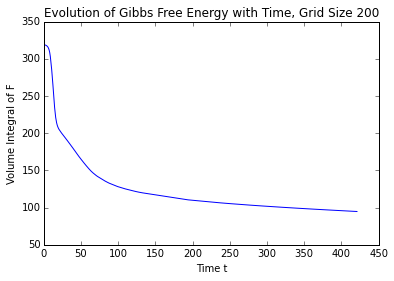

Log-Log Plot


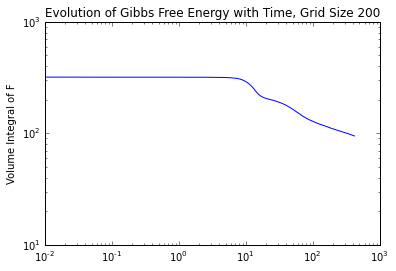

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

print "Regular Plot"

plt.figure(6)
plt.xlabel('Time t')
plt.ylabel('Volume Integral of F')
plt.title('Evolution of Gibbs Free Energy with Time, Grid Size 200')
plt.plot(np.load('1b200/1b200.npz')['time'], np.load('1b200/1b200.npz')['f'])
plt.show()

plt.figure(7)
print "Log-Log Plot"
plt.ylabel('Volume Integral of F')
plt.title('Evolution of Gibbs Free Energy with Time, Grid Size 200')
plt.loglog(np.load('1b200/1b200.npz')['time'], np.load('1b200/1b200.npz')['f'])
plt.show()

## 1b. Overlayed Plots 

This next plot overlays free energy curves for the same problem, for various grid sizes.
The maximum time to which the data is plotted is controlled by the "duration" variable below. This was necessary since some grid sizes were run to different durations than others.

In [25]:
problem = 1
domain = "a"
size = 200
filename = "/data/and9/surf-research/Anushka/1a/"
print filename.format(problem, domain, size)

/data/and9/surf-research/Anushka/1a/1a200


In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

duration = 9990
problem = 1
domain = "c"
size = 50
filename = "/data/and9/surf-research/Anushka/{0}{1}/{0}{1}{2}.npz"

# load and cut off values at given duration
times = np.load(filename.format(problem, domain, size))['time']
times50 = times[times < duration]
vals = np.load(filename.format(problem, domain, size))['f']
vals50 = vals[times < duration]

size = 100

times = np.load(filename.format(problem, domain, size))['time']
times100 = times[times < duration]
vals = np.load(filename.format(problem, domain, size))['f']
vals100 = vals[times < duration]

size = 200

times = np.load(filename.format(problem, domain, size))['time']
times200 = times[times < duration]
vals = np.load(filename.format(problem, domain, size))['f']
vals200 = vals[times < duration]

# size = 400

# times = np.load(filename.format(problem, domain, size))['time']
# times400 = times[times < duration]
# vals = np.load(filename.format(problem, domain, size))['f']
# vals400 = vals[times < duration]

IOError: [Errno 2] No such file or directory: '/data/and9/surf-research/Anushka/1c/1c400.npz'

In [ ]:
plt.figure(8)
plt.xlabel('log (Time)')
plt.ylabel('log (Total free energy, F)')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.loglog(times50x4, vals50x4, 'g', label = 'Grid Size 50')
plt.loglog(times100x2, vals100x2, 'b', label = 'Grid Size 100')
plt.loglog(times200x1, vals200x1, 'r', label = 'Grid Size 200')
plt.loglog(times400x5, vals400x5, 'magenta', label = 'Grid Size 400')
plt.legend(loc='best')
plt.show()

Here, the free energy data from the FiPy runs for various grid sizes is plotted alongside data from a Moose run using the conservative "IterationAdaptive" time stepper.

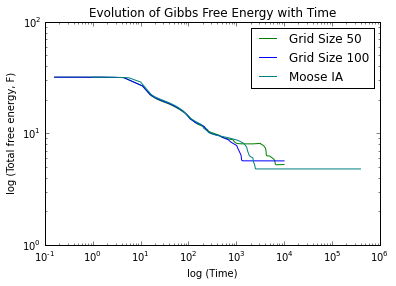

In [37]:
plt.figure(9)
plt.xlabel('log (Time)')
plt.ylabel('log (Total free energy, F)')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.loglog(times50, vals50, 'g', label = 'Grid Size 50')
plt.loglog(times100, vals100, 'b', label = 'Grid Size 100')
# plt.loglog(times200x1, vals200x1, 'r', label = 'Grid Size 200')
# plt.loglog(times400x5, vals400x5, 'magenta', label = 'Grid Size 400')

import pandas as pd
df1 = pd.read_csv("hackathon_p1_tshape_IA.csv")['time']
df2 = pd.read_csv("hackathon_p1_tshape_IA.csv")['TotalEnergy']
plt.loglog(df1, df2, 'teal', label = 'Moose IA')
plt.legend(loc='best')
plt.show()

In [41]:
plt.loglog(times{0}.format(size), vals{0}.format(size), label = 'Grid Size {0}'.format(size))

SyntaxError: invalid syntax (<ipython-input-41-09abc61417a5>, line 1)